# A simple analysis using the plot-likert module

In [1]:
from IPython.display import display, Markdown, Latex # Print markdown in jupyter
import os
import pandas as pd # Dataframes
import plot_likert # Likert scale analysis

### 1. Import dataset

In [2]:
datadir = 'data/' # add this directory in your system and store your csv data there.
table = 'scores.csv' # the name of my dataset. Change it to fit yours.

# Read data into a pandas dataframe
df = pd.read_csv(os.path.join(datadir, table), sep= '\t') # my data is actually a tab-separated table

if not df.empty:
    display(Markdown(f"""_Your file `{table}` is loaded_"""))
    # Look at the description of your dataset
    df.info()
else:
    print(f"""Your dataset was not loaded""")

_Your file `scores.csv` is loaded_

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Participant  319 non-null    object
 1   Question     319 non-null    object
 2   Response     319 non-null    object
 3   Number       319 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 10.1+ KB


In [3]:
# The dataset contains 11 responses for each of the 29 participants in my survey.
# Responses are stacked on top of each other so a new participant is shown every 11 rows.
# Show all columns and the top 23 rows
df.head(23)

,Participant,Question,Response,Number
0,P1,Q1,A,5
1,P1,Q2,A,5
2,P1,Q3,A,5
3,P1,Q4,D,3
4,P1,Q5,N,4
5,P1,Q6,A,5
6,P1,Q7,A,5
7,P1,Q8,A,5
8,P1,Q9,A,5
9,P1,Q10,A,5


### 2. Wrangle dataset
The data must be in an `ID  Question1  Question2  QuestionN` format, so we must make it fit.

In [4]:
# There are no missing (NaN) values are contained in this dataset

# Get likert scores responses in a list of list with all 29 participants and 11 responses each
scores = [df.iloc[x:x+11].Response.tolist() for x in range(0, 310, 11)]

# The responses must be turned into a format that fits the scale in plot_likert (see https://github.com/nmalkin/plot-likert/blob/master/plot_likert/scales.py)
# In this case, the  responses have been abbreviated as "SA, A, N" etc. We will map the responses to a standard format.
scores5_0_dict = {
'SA': '5 - Strongly Agree',  
'A': '4 - Agree',
'N': '3 - Neither Agree nor Disagree',
'D': '2 - Disagree',
'SD': '1 - Strongly Disagree',
'NS': '0 - Not Sure'
}
scores = [[scores5_0_dict[x] for x in subl] for subl in scores]

# =============== IGNORE THIS BIT
# The numbers in scores must be turned into strings to fit the scale in plot_likert (see https://github.com/nmalkin/plot-likert/blob/master/plot_likert/scales.py)
# scores = [[str(x) for x in subl] for subl in scores]
# Get participant IDs
# parts = [df.iat[x,0] for x in range(0, 310, 11)]
# df2['participant'] = parts

In [10]:
# Create dataframe with the scores, then add the participant IDs
question_texts = [
'1. To feel good about myself',
'2. Because it helps me to make money at my job',
'3. Because I do not want to lose my language',
'4. Because I like to listen to Spanish programs on radio and TV',
'5. To give me more chances to express my feelings',
'6. Because it helps me to be more broadly educated',
'7. To keep my traditional values',
'8. Because it is a beautiful language',
'9. To complete part of my general education',
'10. To teach it to my children',
'11. To get along with my parents, relatives, and friends',
]
# df2 = pd.DataFrame(scores, columns = ['Q{}'.format(i) for i in range(1,12)])
df2 = pd.DataFrame(scores, columns = [i for i in question_texts])
# Look at the top 5 rows
df2.head(5)

,1. To feel good about myself,2. Because it helps me to make money at my job,3. Because I do not want to lose my language,4. Because I like to listen to Spanish programs on radio and TV,5. To give me more chances to express my feelings,6. Because it helps me to be more broadly educated,7. To keep my traditional values,8. Because it is a beautiful language,9. To complete part of my general education,10. To teach it to my children,"11. To get along with my parents, relatives, and friends"
0,4 - Agree,4 - Agree,4 - Agree,2 - Disagree,3 - Neither Agree nor Disagree,4 - Agree,4 - Agree,4 - Agree,4 - Agree,4 - Agree,4 - Agree
1,4 - Agree,5 - Strongly Agree,5 - Strongly Agree,4 - Agree,5 - Strongly Agree,4 - Agree,4 - Agree,5 - Strongly Agree,4 - Agree,5 - Strongly Agree,4 - Agree
2,4 - Agree,3 - Neither Agree nor Disagree,4 - Agree,4 - Agree,3 - Neither Agree nor Disagree,4 - Agree,4 - Agree,4 - Agree,4 - Agree,3 - Neither Agree nor Disagree,3 - Neither Agree nor Disagree
3,2 - Disagree,4 - Agree,4 - Agree,3 - Neither Agree nor Disagree,2 - Disagree,4 - Agree,2 - Disagree,4 - Agree,4 - Agree,4 - Agree,3 - Neither Agree nor Disagree
4,4 - Agree,4 - Agree,4 - Agree,4 - Agree,4 - Agree,4 - Agree,4 - Agree,4 - Agree,4 - Agree,4 - Agree,4 - Agree


### 3. Analysis

##### 3.1 Raw counts

In [11]:
counts = plot_likert.likert_counts(df2, plot_likert.scales.scores5_0_custom)
counts

,0 - Not Sure,1 - Strongly Disagree,2 - Disagree,3 - Neither Agree nor Disagree,4 - Agree,5 - Strongly Agree
1. To feel good about myself,0.0,0.0,3.0,1.0,16.0,9.0
2. Because it helps me to make\nmoney at my job,1.0,0.0,0.0,4.0,13.0,11.0
3. Because I do not want to\nlose my language,0.0,0.0,1.0,2.0,11.0,15.0
4. Because I like to listen to\nSpanish programs on radio and\nTV,0.0,1.0,8.0,4.0,10.0,6.0
5. To give me more chances to\nexpress my feelings,1.0,1.0,6.0,4.0,10.0,7.0
6. Because it helps me to be\nmore broadly educated,0.0,0.0,0.0,0.0,12.0,17.0
7. To keep my traditional\nvalues,0.0,0.0,2.0,0.0,16.0,11.0
8. Because it is a beautiful\nlanguage,0.0,0.0,0.0,3.0,12.0,14.0
9. To complete part of my\ngeneral education,0.0,0.0,2.0,1.0,19.0,7.0
10. To teach it to my children,1.0,0.0,0.0,2.0,11.0,15.0


##### 3.2 Percentages

In [12]:
percentages = plot_likert.likert_percentages(df2, plot_likert.scales.scores5_0_custom)
percentages

,0 - Not Sure,1 - Strongly Disagree,2 - Disagree,3 - Neither Agree nor Disagree,4 - Agree,5 - Strongly Agree
1. To feel good about myself,0.000000,0.000000,10.344828,3.448276,55.172414,31.034483
2. Because it helps me to make\nmoney at my job,3.448276,0.000000,0.000000,13.793103,44.827586,37.931034
3. Because I do not want to\nlose my language,0.000000,0.000000,3.448276,6.896552,37.931034,51.724138
4. Because I like to listen to\nSpanish programs on radio and\nTV,0.000000,3.448276,27.586207,13.793103,34.482759,20.689655
5. To give me more chances to\nexpress my feelings,3.448276,3.448276,20.689655,13.793103,34.482759,24.137931
6. Because it helps me to be\nmore broadly educated,0.000000,0.000000,0.000000,0.000000,41.379310,58.620690
7. To keep my traditional\nvalues,0.000000,0.000000,6.896552,0.000000,55.172414,37.931034
8. Because it is a beautiful\nlanguage,0.000000,0.000000,0.000000,10.344828,41.379310,48.275862
9. To complete part of my\ngeneral education,0.000000,0.000000,6.896552,3.448276,65.517241,24.137931
10. To teach it to my children,3.448276,0.000000,0.000000,6.896552,37.931034,51.724138


### 4. Plot

In [13]:
# Customize colors
likert_colors = ['white','green', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']

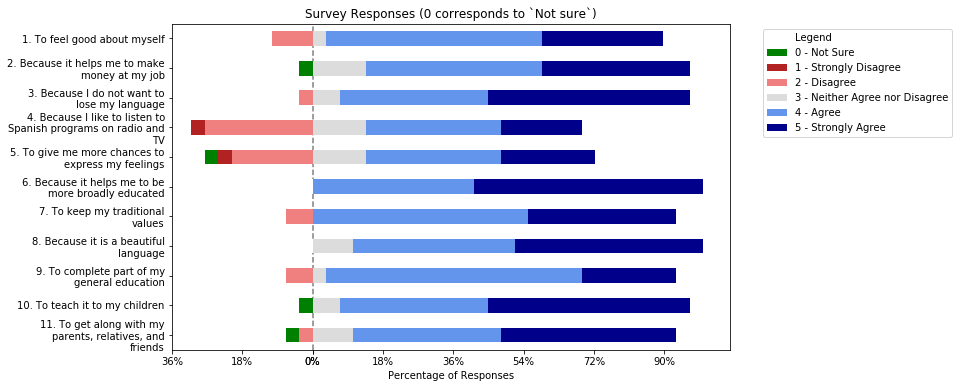

In [14]:
plot_likert.plot_counts(percentages, plot_likert.scales.scores5_0_custom, plot_percentage=True, colors=likert_colors, figsize=[10,6], title="Survey Responses (0 corresponds to `Not sure`)")